In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt 
from scipy.stats import rankdata
%matplotlib inline  

In [2]:
plant_data = pd.read_csv('plants_data_csv.csv')

In [3]:
plant_data.head()

,NAME,GROWTH PERIOD,MEDICINAL,FRUIT/VEGETABLE,COST OF SEED AND FERTILIZERS,HUMAN EFFORT,CLIMATE SUITABLITY,SOIL SUITABILITY,MARKET VALUE OF PRODUCE,AREA
0,A1,7,0,1,7403,80,1,0,9258,4
1,A2,16,1,0,3391,90,1,0,9619,2
2,A3,6,1,0,1162,3,1,1,5989,4
3,A4,7,1,1,526,31,0,1,5911,3
4,A5,2,1,1,7943,16,0,0,8219,5


In [4]:
population = pd.read_csv('population.csv')
population.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,0,0,0,1,1,0,1,0,0,1,...,2,1,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,1,...,2,1,0,0,1,0,1,0,0,1
2,0,1,1,1,0,0,0,1,1,0,...,1,1,0,1,1,1,1,1,1,0
3,1,1,1,0,0,1,1,0,0,1,...,2,1,1,1,0,0,0,1,0,1
4,1,0,1,0,0,1,1,0,1,0,...,2,0,0,1,1,0,0,1,1,1


In [5]:
def mutation( chromosome):
    allel = random.randrange(0,30,1)
    chromosome[allel] = random.randrange(0,3,1)
    return chromosome

In [6]:
def crossover( parent1, parent2):
    exchange_pt = random.randrange(0,30,1)
    #print exchange_pt
    #print parent1
    b = parent1[exchange_pt:30].copy()
    c = parent2[exchange_pt :30].copy()
    #print b
    #print c
    parent1[exchange_pt:30] = c
    parent2[exchange_pt:30] = b
    return (parent1, parent2)

In [7]:
def fitness1_calculation(population):
    fitness = []
    for chrom in range(len(population.index)): 
        fitness_value = 0.0
        #print chrom
        for i in range(30):
            fitness_value += population.iloc[chrom][i]*(plant_data['MARKET VALUE OF PRODUCE'][i]- plant_data['COST OF SEED AND FERTILIZERS'][i])
            #print type(fitness_value)
        fitness.append(fitness_value)
    return fitness    

In [8]:
print(fitness1_calculation(population))

[-20011.0, -9946.0, 26449.0, 1578.0, 11196.0, 10287.0, 8112.0, -1316.0, 5974.0, 8156.0, 1531.0, 23134.0, -10063.0, -10772.0, -867.0, 25459.0, -8783.0, 2428.0, 22965.0, 32605.0, -1130.0, -8499.0, 15952.0, -900.0, 9044.0, -15312.0, 19202.0, 12394.0, 22162.0, 17208.0, 15343.0, -589.0, -594.0, 3762.0, 2301.0, 6635.0, -13122.0, -10332.0, 16432.0, 14553.0, 13891.0, -2072.0, 1804.0, -2138.0, 22778.0, 13413.0, 11570.0, -3642.0, 5164.0, 8786.0]


In [9]:
def fitness2_calculation(population):
    fitness = []
    for chrom in range(len(population.index)):
        fitness_value = 0.0
        for i in range(30):
            x = population.iloc[chrom][i]*(plant_data['GROWTH PERIOD'][i] + 12* plant_data['SOIL SUITABILITY'][i] 
                                      + 12*plant_data['CLIMATE SUITABLITY'][i] )
            fitness_value += math.exp(-x)
        fitness.append(fitness_value)
    return fitness 

In [10]:
print(fitness2_calculation(population))

[16.135341593626418, 16.13545881150275, 9.00045916109116, 10.000344032319358, 13.00033789804311, 14.135458713925757, 12.135796703864468, 15.135467272669779, 15.000337857369347, 10.135461021765925, 19.0001235640957, 17.13546119955754, 13.13567080873357, 13.135461001449134, 15.135676895964865, 9.135802726393456, 14.13567090597095, 19.135670757108805, 20.0001257883094, 12.135671023865598, 12.00045889995015, 11.135465012779733, 12.135458859264183, 15.135461108103279, 10.135670901119658, 12.000458940548263, 10.135467376341644, 17.000467389828792, 9.000123697463161, 14.13533770415304, 19.000006191216603, 14.000337741125747, 14.000006426955547, 15.000335632830986, 14.135670927038417, 13.0001234782031, 14.00046735069307, 16.000000175815693, 10.135671003294139, 15.135337662031219, 13.000123795214975, 15.13533544945268, 11.135343857993435, 15.135341469447205, 13.000123575227146, 13.13567304895894, 18.135343729188946, 17.000006150381118, 18.00046118080104, 11.000125691327261]


In [11]:
def sum_of_weighted_ratios(fitness1, fitness2):
    min_f1 = min(fitness1)
    max_f1 = max(fitness1)
    min_f2 = min(fitness2)
    max_f2 = max(fitness2)
    fitness1 = (fitness1-min_f1)/(max_f1-min_f1)
    fitness2 = (fitness2-min_f2)/(max_f2-min_f2)
    fitness = fitness1+fitness2
    return fitness

In [12]:
fitness = sum_of_weighted_ratios(np.array(fitness1_calculation(population)), np.array(fitness2_calculation(population)))

In [13]:
rankdata(fitness)

array([ 10.,  20.,  24.,   3.,  31.,  38.,  16.,  28.,  37.,   9.,  44.,
        48.,   5.,   4.,  30.,  23.,  12.,  46.,  50.,  42.,   8.,   2.,
        32.,  29.,  11.,   1.,  21.,  45.,  15.,  39.,  49.,  19.,  18.,
        33.,  25.,  22.,   6.,  17.,  14.,  41.,  34.,  27.,   7.,  26.,
        40.,  35.,  47.,  36.,  43.,  13.])

In [14]:
def objective(population):
    fitness1 = np.array(fitness1_calculation(population))
    fitness2 = np.array(fitness2_calculation(population))
    cost = sum_of_weighted_ratios(fitness1 , fitness2)
    return cost , rankdata(fitness)

In [15]:
population['Cost'] , population['Objective'] = objective(population)
population.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,Cost,Objective
0,0,0,0,1,1,0,1,0,0,1,...,0,1,1,0,0,0,0,0,0.648656,10.0
1,0,0,0,0,1,0,0,0,1,1,...,0,0,1,0,1,0,0,1,0.839958,20.0
2,0,1,1,1,0,0,0,1,1,0,...,0,1,1,1,1,1,1,0,0.883032,24.0
3,1,1,1,0,0,1,1,0,0,1,...,1,1,0,0,0,1,0,1,0.501242,3.0
4,1,0,1,0,0,1,1,0,1,0,...,0,1,1,0,0,1,1,1,0.956764,31.0


In [16]:
def survivor_selection(population, max_area):
    isDrop = []
    for chrom in range(len(population.index)):
        area = 0.0
        for i in range(30):
            area += population.iloc[chrom][i]*plant_data['AREA'][i]
        if area > max_area:
            isDrop.append(True)
        else:
            isDrop.append(False)
    population = population.drop(population[isDrop].index)
    return population    

In [17]:
print len(population)

50


In [18]:
def tournament( rank , participants):
    return min(rank[participants])

In [19]:
def sampling( size, k):
    x = random.sample(range(0, size), k)
    part = np.full((size), False)
    for i in x:
        part[i] = True
    return part    

In [20]:
part = sampling(50,3)
print tournament(population.iloc[:,31].values, part.astype(bool))

2.0


C:\Users\Dell\Anaconda2\envs\gl-env\lib\site-packages\numpy\core\numeric.py:294: FutureWarning: in the future, full(50, False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [21]:
pop_size = 50
cost_values = []
for i in range(1000):
    if pop_size < 20:
        break
    part = sampling(pop_size,10)
    parent1 = int(tournament(population.iloc[:,31].values, part.astype(bool)))-1
    part = sampling(pop_size,10)
    parent2 = int(tournament(population.iloc[:,31].values, part.astype(bool)))-1
    #print parent1, parent2
    #print population.shape
    if parent1 != parent2:
        population.iloc[parent1, 0:30], population.iloc[parent2,0:30] = crossover(population.iloc[parent1, 0:30].copy(), population.iloc[parent2,0:30].copy())
    population.iloc[parent1, 0:30] = mutation(population.iloc[parent1,0:30])
    population.iloc[parent2, 0:30] = mutation(population.iloc[parent2, 0:30])
    population['Cost'] , population['Objective'] = objective(population)
    temp = float(population[population['Objective'] == 1]['Cost'].values)
    cost_values.append(temp)
    #population = survivor_selection(population, 100)
    pop_size = len(population)
    #print population.shape
    #print pop_size
    #population['Cost'] , population['Objective'] = objective(population)
    #print population.iloc[parent2,:]

In [22]:
cost_values

[0.36206513252718714,
 0.36177079663477496,
 0.36177079663477496,
 0.36177079663477496,
 0.36177079663477496,
 0.36177079663477496,
 0.36177079663477496,
 0.2727576975264269,
 0.2727576975264269,
 0.2727576975264269,
 0.2727576975264269,
 0.2727576975264269,
 0.33334211548699955,
 0.45615908908931346,
 0.45582947239642574,
 0.4559255872553779,
 0.4559255872553779,
 0.44209938351738354,
 0.44209938351738354,
 0.44209938351738354,
 0.45625542636706984,
 0.45625542636706984,
 0.45097577815955225,
 0.45097577815955225,
 0.45097577815955225,
 0.3903913601989797,
 0.3903913601989797,
 0.44782799404994433,
 0.44782799404994433,
 0.44782799404994433,
 0.44782799404994433,
 0.44782799404994433,
 0.4588808397769577,
 0.4588808397769577,
 0.44834416080036615,
 0.44834416080036615,
 0.44834416080036615,
 0.4491411762631877,
 0.4436693406676575,
 0.4436693406676575,
 0.4423415531681311,
 0.4588808397769577,
 0.4588808397769577,
 0.4588808397769577,
 0.4588808397769577,
 0.4588808397769577,
 0.45888

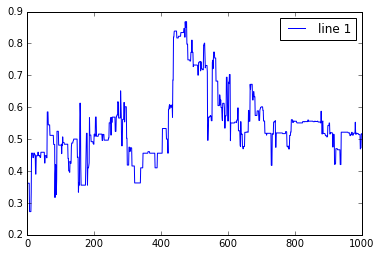

In [23]:
plt.plot(cost_values, label = "line 1") 
plt.legend() 
plt.show()